<img src = "https://universidadean.edu.co/sites/default/files/noticias/galeria/Logo-Universidad-Ean-fondo-negro-Galeria_1.jpg" alt = "Universidad EAN" width = "50%"  height="160
0">  </img>

En esta guía de trabajo usted deberá poner en práctica los conceptos fundamentales y las herramientas para realizar **temas tratados en la unidad** y **agrupación jerarquica** con *Python*.  

Para iniciar, se requiere cargar las librarías necesarias, en caso de necesitar otras puede agregarlas a la celda.

In [2]:
# Cargar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler  # normalizar los datos
from sklearn.preprocessing import MinMaxScaler # normalizar los datos
from scipy.spatial.distance import pdist, squareform  # cálculo de distancias
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster  # agrupación jerárquica
from scipy.cluster.hierarchy import cut_tree  # cortar el dendograma

import warnings
warnings.filterwarnings("ignore")

## **⚛️ 1. Datos**
---

La base de datos a utilizar se denimona **`Loan Data`**. Este conjunto de datos está disponible públicamente en el sitio web de [Kaggle](https://www.kaggle.com/datasets/itssuru/loan-data?resource=download), La base de datos contiene información sobre préstamos y está diseñada para ayudar a los usuarios a realizar análisis financieros, evaluar el comportamiento de los prestatarios y modelar la probabilidad de incumplimiento. Incluye variables relacionadas con el monto del préstamo, el historial crediticio, el propósito del préstamo, las tasas de interés y otra información relevante para predecir el riesgo de crédito y el rendimiento de los préstamos. Ideal para construir modelos de clasificación, análisis exploratorio y optimización de riesgos financieros.

In [3]:
url = "https://drive.usercontent.google.com/u/0/uc?id=1tFpmTCYJHQ8lIob2WIxJypL0Z8DToIJz&export=download"
df = pd.read_csv(url)

**Nombres de los integrantes del grupo**

*   Jiliar Antonio Silgado Cardona

## **✅ Exploración de los datos**

### **⭕️ Introducción a la Fase de Exploración de Datos**

En esta fase inicial del análisis de datos, se realiza una exploración preliminar del conjunto de datos para comprender su estructura y características básicas. Esta etapa es crucial para identificar los aspectos fundamentales del dataset y preparar el terreno para un análisis más profundo.

Durante la exploración, se utilizan diversas instrucciones para obtener una visión general del conjunto de datos:

- **`df.info()`**: Proporciona un resumen conciso de la información del DataFrame, incluyendo el número de entradas no nulas y los tipos de datos de cada columna.
- **`print(df.shape)`**: Muestra las dimensiones del DataFrame, es decir, el número de filas y columnas.
- **`print(df.head())`**: Muestra las primeras filas del DataFrame, facilitando una vista rápida de los datos.
- **`print(df.tail())`**: Muestra las últimas filas del DataFrame, útil para verificar el final del dataset.
- **`print(total_size)`**: Indica el tamaño total del DataFrame en términos de número de filas.
- **`print(df.shape)`**: Indica la dimensión del Dataframe (filas, columnas).
- **`print(df.memory_usage(deep=True))`**: Proporciona el uso de memoria por columna, permitiendo identificar el consumo de recursos.
- **`print(df.columns)`**: Lista los nombres de todas las columnas en el DataFrame.

Estas instrucciones ofrecen una visión general del conjunto de datos, ayudando a detectar posibles problemas como datos faltantes, tipos de datos incorrectos o inconsistencias. Esta exploración es un primer paso esencial para un análisis de datos eficaz.

In [4]:
# Información de Dataframe
print("Información general del DataFrame:\n")
df.info()

Información general del DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### **⭕️ Diccionario de datos**

Este diccionario de datos proporciona una descripción detallada de las columnas contenidas en el archivo `loan_data.csv`. Cada columna está detallada con su tipo de dato (`Dtype`), una breve descripción del tipo de dato (`Descripción Dtype`), el tamaño en bytes ocupado por el tipo de dato (`Tamaño en Bytes`), y una descripción de los datos representados en esa columna.

El propósito de este diccionario es facilitar la comprensión de la estructura del conjunto de datos y ayudar en el análisis y la manipulación de la información.

**Descripción de las Columnas en** `loan_data.csv`

| Column             | Dtype    | Description Dtype | Tamaño en Bytes | Descripción                                               |
|--------------------|----------|-------------------|-----------------|-----------------------------------------------------------|
| credit.policy      | int64    | Entero            | 8               | Política de crédito aplicada al prestatario               |
| purpose            | object   | Cadena de texto   | 64 (aprox.)     | Propósito del préstamo (por ejemplo, consolidación de deuda)|
| int.rate           | float64  | Flotante          | 8               | Tasa de interés anual del préstamo                        |
| installment        | float64  | Flotante          | 8               | Cantidad mensual del pago de la cuota                      |
| log.annual.inc     | float64  | Flotante          | 8               | Logaritmo del ingreso anual reportado                      |
| dti                | float64  | Flotante          | 8               | Relación deuda-ingreso del prestatario                     |
| fico               | int64    | Entero            | 8               | Puntaje FICO del prestatario                               |
| days.with.cr.line  | float64  | Flotante          | 8               | Días con una línea de crédito activa                       |
| revol.bal          | int64    | Entero            | 8               | Saldo rotativo en la cuenta de crédito                     |
| revol.util         | float64  | Flotante          | 8               | Tasa de utilización del crédito rotativo                   |
| inq.last.6mths     | int64    | Entero            | 8               | Número de consultas de crédito en los últimos 6 meses      |
| delinq.2yrs        | int64    | Entero            | 8               | Número de veces que el prestatario ha incumplido en 2 años |
| pub.rec            | int64    | Entero            | 8               | Número de registros públicos                               |
| not.fully.paid     | int64    | Entero            | 8               | Indicador de si el préstamo no ha sido completamente pagado|



#### **⭕️ Primeras filas del DataFrame**

In [5]:
# Primeros registros
print(df.head())

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

#### **⭕️ Últimas filas del DataFrame**

In [6]:
# ultimos registros
print(df.tail())

      credit.policy             purpose  int.rate  installment  \
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
9573       12.180755  10.39   672       10474.000000     215372        82.1   
9574       11.141862   0.21   722        4380.000000        184         1.1   
9575       10.596635  13.09   687        3450.041667      10036        82.9   
9576       10.819778  19.18   692        1800.000000          0         3.2   
9577       11.264464  16.28   732        4740.000000      37879        57.0   

      inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid  
9573               2            0        0               1  
9574  

#### **⭕️ Tamaño total del DataFrame en términos de número de filas**

In [7]:
# total de registros
total_size = len(df)
print(f'Tamaño (Número de Filas): {total_size}')

Tamaño (Número de Filas): 9578


#### **⭕️ Dimensión del Dataframe (Filas x Columnas)**

In [8]:
# dimensión del conjunto de datos (filas, columnas)
print("\nDimensión del conjunto de datos (filas, columnas):")
print(df.shape)


Dimensión del conjunto de datos (filas, columnas):
(9578, 14)


#### **⭕️ Uso de memoria por columna**

In [9]:
# mostrar el tamaño de la memoria utilizada por el DataFrame
print("Memoria utilizada por el DataFrame (bytes):\n")
print(df.memory_usage(deep=True))

Memoria utilizada por el DataFrame (bytes):

Index                   132
credit.policy         76624
purpose              604030
int.rate              76624
installment           76624
log.annual.inc        76624
dti                   76624
fico                  76624
days.with.cr.line     76624
revol.bal             76624
revol.util            76624
inq.last.6mths        76624
delinq.2yrs           76624
pub.rec               76624
not.fully.paid        76624
dtype: int64


#### **⭕️ Columnas (Variables) en Dataframe**

In [10]:
# nombres de las columnas
print("\nNombres de las columnas:")
print(df.columns)


Nombres de las columnas:
Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')


#### **⭕️ Número Total de Variables**

In [11]:
# Número total de variables que contiene la base de datos.
num_columnas = df.shape[1]
print(f'Número de variables (columnas): {num_columnas}')

Número de variables (columnas): 14


#### **⭕️ Variables con datos faltantes, Porcentaje total de valores faltantes en la base de datos.**

In [12]:
import json

# Escribir las variables que tienen datos faltantes, además, proporcionar el porcentaje total de valores faltantes en la base de datos.
# Paso 1: Encontrar columnas con valores faltantes
faltantes_por_columna = df.isnull().sum()

# Paso 2: Filtrar columnas que tienen valores faltantes
data1 = faltantes_por_columna[faltantes_por_columna > 0]
variables_con_faltantes = data1.to_dict()

print('\nCant. valores faltantes por columna:',
      json.dumps(variables_con_faltantes, indent=4),
      sep="\n")

# Paso 3: Calcular el porcentaje de valores faltantes por columna
data = (data1 / len(df)) * 100
data = data.to_dict()
porcentaje_faltantes_por_columna = {key: f'{value:.2f}%' for key, value in data.items()}

# Paso 4: Calcular el porcentaje total de valores faltantes en el DataFrame
porcentaje_total_faltantes = (df.isnull().sum().sum() / df.size) * 100
porcentaje_total_no_faltantes = (df.notnull().sum().sum() / df.size) * 100

# Resultados
print('\n% valores faltantes por columna:', f'{json.dumps(porcentaje_faltantes_por_columna, indent=4)}', sep="\n")

print(f"\nPorcentaje total de valores faltantes en la base de datos: {porcentaje_total_faltantes:.2f}%")
print(f"Porcentaje total de valores en la base de datos: {porcentaje_total_no_faltantes:.2f}%")


Cant. valores faltantes por columna:
{}

% valores faltantes por columna:
{}

Porcentaje total de valores faltantes en la base de datos: 0.00%
Porcentaje total de valores en la base de datos: 100.00%


#### **⭕️ Limpieza de datos**

No existen datos vacios dentro del dataset

##**⚛️ 2. Tabla de Frecuencias para la variable `purpose`**  

In [13]:
# Calcular la frecuencia absoluta
frecuencia_absoluta = df['purpose'].value_counts()

# Calcular la frecuencia absoluta acumulada
frecuencia_absoluta_acumulada = frecuencia_absoluta.cumsum()

# Calcular la frecuencia relativa
frecuencia_relativa = frecuencia_absoluta / len(df)

# Calcular la frecuencia relativa acumulada
frecuencia_relativa_acumulada = frecuencia_relativa.cumsum()

#Consolidación de frecuencias

frecuencias = {
    'Absoluta': frecuencia_absoluta,
    'Absoluta Acum.': frecuencia_absoluta_acumulada,
    'Relativa': frecuencia_relativa,
    'Relativa Acum.': frecuencia_relativa_acumulada
}

# Crear un nuevo DataFrame con todos los resultados
tabla_frecuencias = pd.DataFrame(frecuencias)

# Mostrar la tabla de frecuencias
print("\nTabla de Frequencias:")
print(tabla_frecuencias)



Tabla de Frequencias:
                    Absoluta  Absoluta Acum.  Relativa  Relativa Acum.
purpose                                                               
debt_consolidation      3957            3957  0.413134        0.413134
all_other               2331            6288  0.243370        0.656504
credit_card             1262            7550  0.131760        0.788265
home_improvement         629            8179  0.065671        0.853936
small_business           619            8798  0.064627        0.918563
major_purchase           437            9235  0.045625        0.964189
educational              343            9578  0.035811        1.000000


##**⚛️ 3. Filtrado de Base de datos**  

In [14]:
# Filtrar el DataFrame original para considerar solo la categoría 'small_business'
df_small_business = df[df['purpose'] == 'small_business']

# Mostrar el DataFrame consolidado
df_small_business

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
13,1,small_business,0.0714,92.82,11.512925,6.50,747,4384.000000,3021,4.8,0,1,0,0
42,1,small_business,0.0870,94.98,10.126631,14.54,752,2460.000000,3660,7.8,1,0,0,0
51,1,small_business,0.1028,323.98,10.217422,10.70,712,1379.000000,3534,54.4,0,0,0,0
52,1,small_business,0.1059,813.65,10.778956,4.05,762,2729.958333,2422,23.3,0,0,0,0
55,1,small_business,0.1059,398.69,11.002100,17.12,747,14008.958330,17214,8.1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9496,0,small_business,0.1635,169.58,10.566176,5.35,692,3390.041667,837,34.9,4,0,0,0
9535,0,small_business,0.1496,831.52,12.765688,11.38,717,8520.041667,1207359,56.0,7,0,0,1
9536,0,small_business,0.1348,542.79,12.611538,3.12,737,7410.041667,211931,10.0,7,2,0,1
9539,0,small_business,0.1533,870.71,11.849398,23.81,712,7775.041667,60048,80.1,5,0,0,0


##**⚛️ 4. Procesamiento de los datos**  

⭕️ Examinar el porcentaje de datos faltantes por variable. En caso de tener datos faltantes, eliminarlos.

In [15]:
# Calcular el porcentaje de datos faltantes por variable
porcentaje_faltantes_small_business = df_small_business.isnull().mean() * 100

# Mostrar el porcentaje de datos faltantes
print("\nPorcentaje de datos faltantes:")
print(porcentaje_faltantes_small_business)


Porcentaje de datos faltantes:
credit.policy        0.0
purpose              0.0
int.rate             0.0
installment          0.0
log.annual.inc       0.0
dti                  0.0
fico                 0.0
days.with.cr.line    0.0
revol.bal            0.0
revol.util           0.0
inq.last.6mths       0.0
delinq.2yrs          0.0
pub.rec              0.0
not.fully.paid       0.0
dtype: float64


**NOTA:** No existen datos faltantes por variable.

⭕️ Remover la variable categórica: `purpose`

In [16]:
# Remover la columna 'purpose'
df_small_business_without_purpouse = df_small_business.drop(columns=['purpose'])

# Mostrar el DataFrame consolidado
df_small_business_without_purpouse

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
13,1,0.0714,92.82,11.512925,6.50,747,4384.000000,3021,4.8,0,1,0,0
42,1,0.0870,94.98,10.126631,14.54,752,2460.000000,3660,7.8,1,0,0,0
51,1,0.1028,323.98,10.217422,10.70,712,1379.000000,3534,54.4,0,0,0,0
52,1,0.1059,813.65,10.778956,4.05,762,2729.958333,2422,23.3,0,0,0,0
55,1,0.1059,398.69,11.002100,17.12,747,14008.958330,17214,8.1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9496,0,0.1635,169.58,10.566176,5.35,692,3390.041667,837,34.9,4,0,0,0
9535,0,0.1496,831.52,12.765688,11.38,717,8520.041667,1207359,56.0,7,0,0,1
9536,0,0.1348,542.79,12.611538,3.12,737,7410.041667,211931,10.0,7,2,0,1
9539,0,0.1533,870.71,11.849398,23.81,712,7775.041667,60048,80.1,5,0,0,0


⭕️ Análisis de datos atípicos utilizando diagramas de caja. (Solo variables numericas con datos atipicos.)

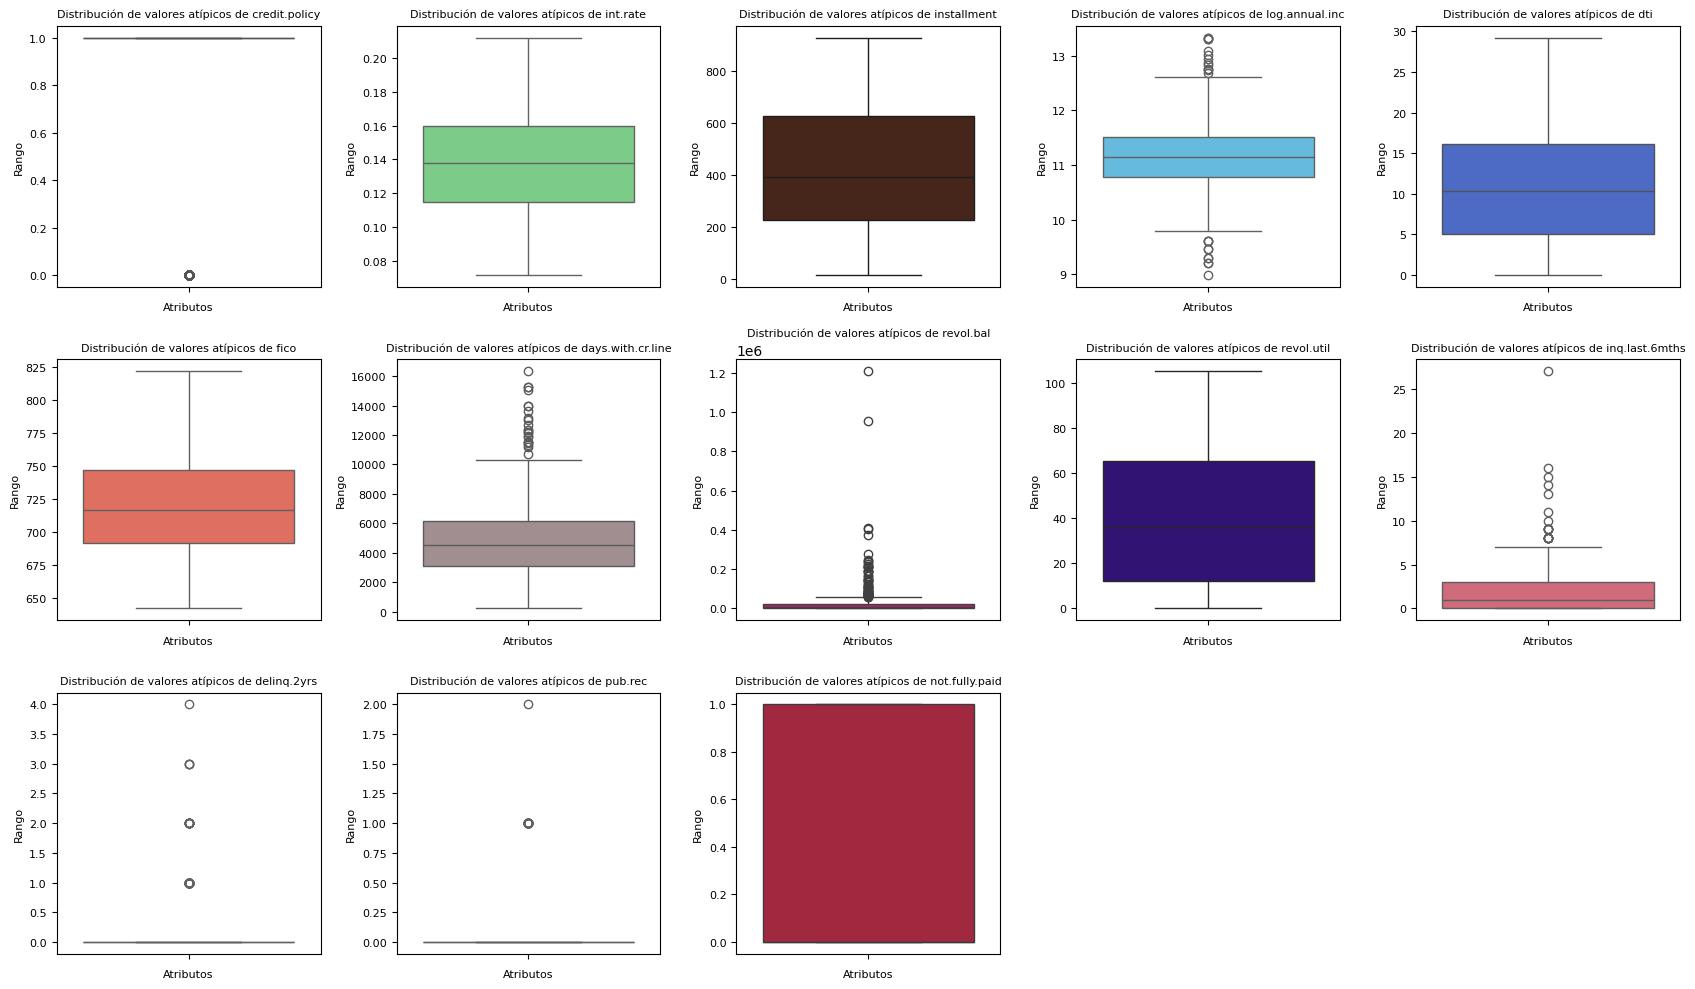

In [17]:
# análisis de valores atípicos
def show_boxplot1(df_num):
  # Ajustar el tamaño de la figura
  plt.figure(figsize=(17, 10))

  # Calcular el número de filas y columnas para los subgráficos
  num_vars = len(df_num.columns)
  num_cols = 5  # Número de columnas de subgráficas
  num_rows = np.ceil(num_vars / num_cols).astype(int)  # Calcular número de filas

  # Iterar a través de las columnas numéricas y crear un boxplot para cada una
  for i, column in enumerate(df_num.columns):
      plt.subplot(num_rows, num_cols, i + 1)  # Ajusta según el número de variables
      # Generar un color aleatorio
      random_color = np.random.rand(3,)  # Genera un color RGB aleatorio
      sns.boxplot(y=df_num[column], color=random_color)  # Usar el color aleatorio
      plt.title(f'Distribución de valores atípicos de {column}', fontsize = 8)
      plt.ylabel("Rango", fontsize = 8)
      plt.xlabel("Atributos", fontsize = 8 )
      plt.tick_params(axis='y', labelsize=8)  # Cambia el tamaño de las etiquetas de los ticks en el eje Y
      plt.tick_params(axis='x', labelsize=8)  # Cambia el tamaño de las etiquetas de los ticks en el eje X

  plt.tight_layout()
  plt.show()

show_boxplot1(df_small_business_without_purpouse)

### ⭕️ **Analisis del Grafico**

| **Variable**              | **Análisis**                                                                                                                                                                           |
|---------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **credit.policy**         | Variable categórica binaria (0 o 1). No se esperan datos atípicos, ya que su naturaleza es categórica.                                                                             |
| **int.rate**              | Puede tener valores atípicos, especialmente tasas extremadamente altas o bajas en comparación con el promedio del mercado, indicando prestatarios con tasas de interés excepcionales.   |
| **installment**           | Puede presentar datos atípicos con cuotas inusualmente altas, lo que puede indicar préstamos de alto riesgo o situaciones financieras particulares.                                   |
| **log.annual.inc**        | Puede mostrar datos atípicos tanto por encima como por debajo de los bigotes, representando ingresos inusualmente bajos o altos que influyen en la evaluación crediticia.            |
| **dti**                   | Datos atípicos pueden surgir donde los prestatarios tienen una alta carga de deuda en relación a sus ingresos, indicando un mayor riesgo de incumplimiento.                         |
| **fico**                  | Puede tener valores atípicos que representan prestatarios con puntuaciones inusuales, cruciales para la aprobación de créditos.                                                    |
| **days.with.cr.line**    | Puede mostrar datos atípicos para aquellos con una línea de crédito activa inusualmente larga, indicando comportamiento de gasto arriesgado.                                         |
| **revol.bal**             | Puede tener varios puntos atípicos por encima de los bigotes, indicando un uso excesivo del crédito y potenciales problemas financieros.                                             |
| **revol.util**           | Puede mostrar datos atípicos con prestatarios utilizando un porcentaje inusualmente alto de su crédito disponible, lo que indica falta de manejo del crédito.                       |
| **inq.last.6mths**       | Puede tener puntos atípicos reflejando búsqueda activa de crédito. Un alto número de consultas podría indicar una situación financiera precaria.                                      |
| **delinq.2yrs**          | Con pocos puntos atípicos por encima de los bigotes, la mayoría de los prestatarios pueden tener una experiencia crediticia razonablemente buena.                                     |
| **pub.rec**               | Pocos puntos atípicos indican que la mayoría de los prestatarios están en una buena posición financiera, aunque cualquier registro puede ser motivo de preocupación.                   |
| **not.fully.paid**        | Caja con grosor amplio sugiere que la mayoría de los prestatarios han pagado sus préstamos. Sin datos por debajo de la media, esto indica que están cumpliendo con sus obligaciones. |


⭕️ Normalización de conjunto de datos por medio del método `MiniMaxScaler`.


In [18]:
def normalize_data(df_num):
    # Crear un objeto MinMaxScaler
    scaler = MinMaxScaler()

    # ajustar y transformar el data frame
    scaled_data = scaler.fit_transform(df_num)

    # convertir los datos escalados a data frame y mantener los nombres de las columnas
    df_scaled = pd.DataFrame(scaled_data, columns=df_num.columns)

    return df_scaled

# convertir los datos escalados a data frame y mantener los nombres de las columnas
df_normalized = normalize_data(df_small_business_without_purpouse)

⭕️ Análisis de datos atípicos utilizando diagramas de caja. (Normalizado con MinMaxScaler)



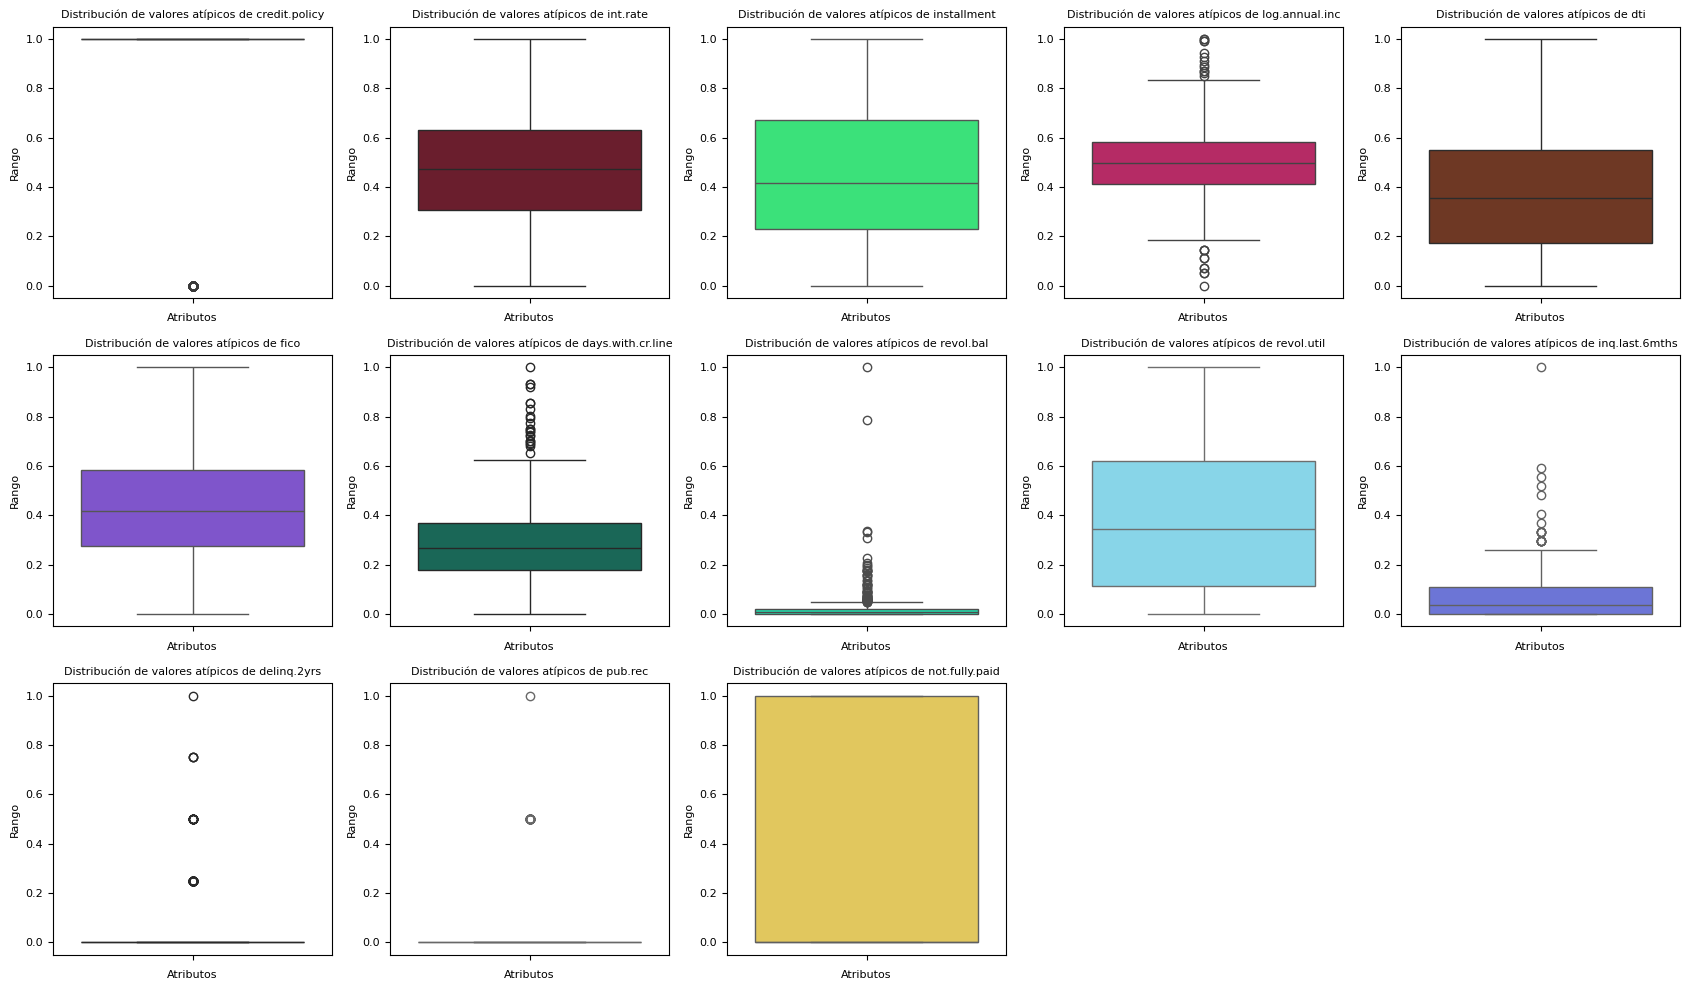

In [19]:
show_boxplot1(df_normalized)

###⭕️ **Comentarios**

Al aplicar el `MinMaxScaler` a los datos, las variables numéricas son transformadas a un rango entre 0 y 1. Este escalado es útil para mantener la distribución original de los datos mientras ajusta todas las variables a la misma escala.

**Reducción de Disparidades:** Las variables que originalmente tenían rangos muy amplios, como days.with.cr.line o revol.bal, ahora están contenidas entre 0 y 1, lo que elimina las disparidades en magnitud entre las distintas variables.

**Valores atipicos:** Aunque el escalado transforma las variables, los datos atípicos (outliers) siguen presentes, pero en un rango más ajustado. Esto significa que valores que antes eran muy altos o muy bajos ahora están cerca de los extremos del rango escalado (0 o 1)

⭕️ Conformación de un conjunto de datos con las variables cuyo comportamiento después de normalizadas es aproximadamente simétrico con respecto a sus medidas de centro o no exhiben datos atipicos.

In [20]:
# Crear el conjunto de datos df_selec con las variables seleccionadas
df_selec = df_normalized[['log.annual.inc', 'dti', 'fico', 'revol.util']]

# Mostrar el DataFrame consolidado
df_selec

,log.annual.inc,dti,fico,revol.util
0,0.581455,0.222527,0.583333,0.045627
1,0.262312,0.497775,0.611111,0.074144
2,0.283214,0.366313,0.388889,0.517110
3,0.412486,0.138651,0.666667,0.221483
4,0.463857,0.586101,0.583333,0.076996
...,...,...,...,...
614,0.363501,0.183156,0.277778,0.331749
615,0.869857,0.389593,0.416667,0.532319
616,0.834370,0.106813,0.527778,0.095057
617,0.658916,0.815132,0.388889,0.761407


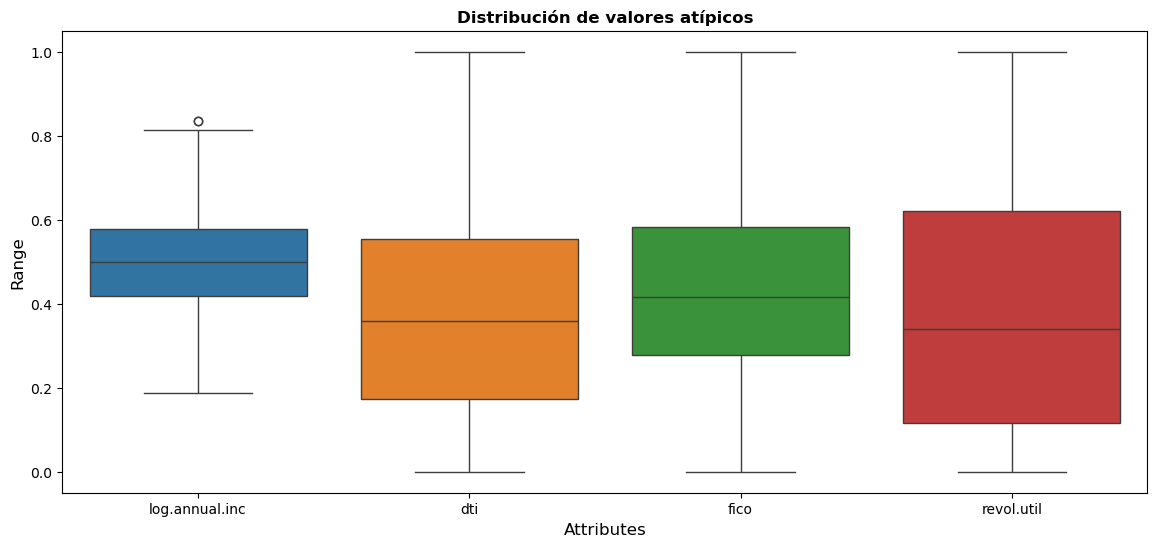

In [21]:
# función para eliminar outliers
def remove_outliers(data):
    df = data.copy()
    filter_condition = pd.Series([True] * len(df), index=df.index)

    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        filter_condition &= (df[col] >= lower_bound) & (df[col] <= upper_bound)

    df = df[filter_condition]
    return df

without_outliers = remove_outliers(df_selec)

# análisis de valores atípicos
def show_boxplot2(df):
  plt.rcParams['figure.figsize'] = [14,6]
  sns.boxplot(data = df, orient="v")
  plt.title("Distribución de valores atípicos", fontweight = 'bold', fontsize = 12)
  plt.ylabel("Range", fontsize = 12)
  plt.xlabel("Attributes", fontsize = 12)

show_boxplot2(without_outliers)

In [22]:
without_outliers.head()

,log.annual.inc,dti,fico,revol.util
0,0.581455,0.222527,0.583333,0.045627
1,0.262312,0.497775,0.611111,0.074144
2,0.283214,0.366313,0.388889,0.517110
3,0.412486,0.138651,0.666667,0.221483
4,0.463857,0.586101,0.583333,0.076996


In [23]:
# individuos que se remueven del conjunto de datos
print(df_selec.shape)
print(without_outliers.shape)
print('-'*100)
diferencias_filas = pd.concat([df_selec, without_outliers]).drop_duplicates(keep=False)
print(diferencias_filas)

(619, 4)
(596, 4)
----------------------------------------------------------------------------------------------------
     log.annual.inc       dti      fico  revol.util
7          0.144714  0.419035  0.166667    0.523764
11         0.051371  0.000000  0.111111    0.519962
13         0.942571  0.082164  0.305556    0.574144
17         1.000000  0.131119  0.777778    0.062738
62         0.869857  0.200616  0.277778    0.692966
124        0.073312  0.855187  0.472222    0.602662
131        0.051371  0.041082  0.138889    0.092205
133        0.894770  0.536802  0.833333    0.080798
194        0.111770  0.031496  0.472222    0.455323
300        0.111770  0.575145  0.666667    0.071293
305        0.144714  0.514892  0.805556    0.033270
335        0.073312  0.302636  0.277778    0.000000
371        0.144714  0.777816  0.277778    0.532319
477        0.993941  0.157823  0.500000    0.624525
488        0.863184  0.410476  0.611111    0.052281
501        1.000000  0.079767  0.277778    0.0000

In [24]:
data_scaler = MinMaxScaler()

scaled_data = data_scaler.fit_transform(without_outliers)

# implementación del algoritmo con diferentes funciones de enlace
euclidean_clustering = linkage(scaled_data, method="complete", metric="euclidean")
cityblock_clustering = linkage(scaled_data, method="complete", metric="cityblock")
manhattan_clustering = linkage(scaled_data, method="complete", metric="cosine")
minkowski_clustering = linkage(scaled_data, method="complete", metric="minkowski")

print(scaled_data.shape)

(596, 4)


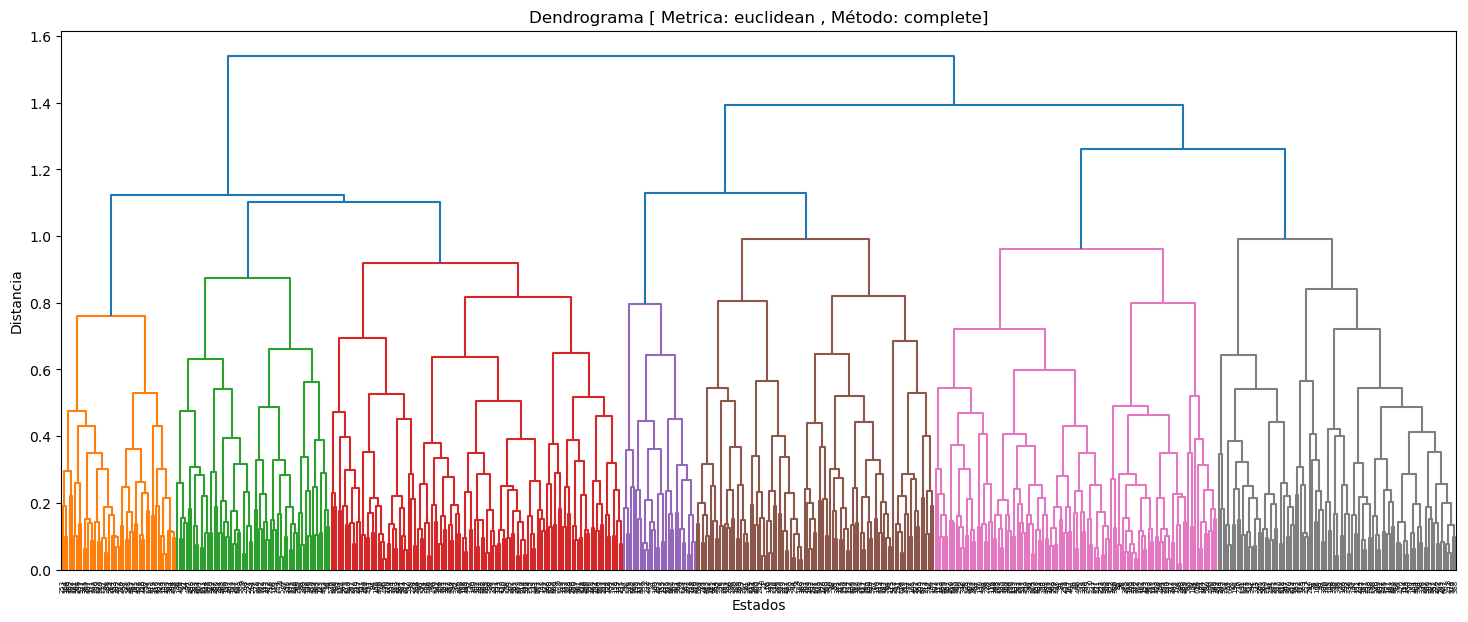

In [25]:
def dendrogram_plot(clustering, labels, metric, method):
  plt.figure(figsize=(18, 7))
  dendrogram(clustering, labels = labels)
  plt.title(f"Dendrograma [ Metrica: {metric} , Método: {method}]")
  plt.xlabel("Estados")
  plt.ylabel("Distancia")
  plt.show()

dendrogram_plot(euclidean_clustering, without_outliers.index, 'euclidean', 'complete')

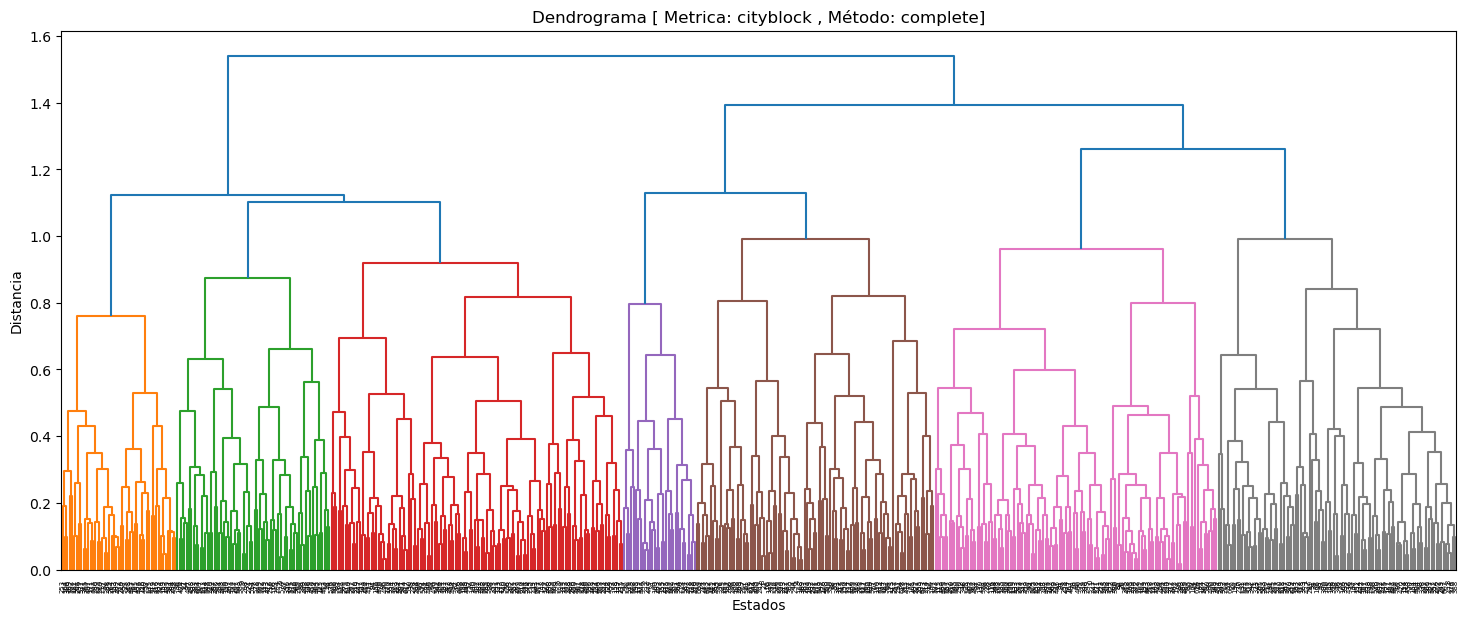

In [26]:
dendrogram_plot(euclidean_clustering, without_outliers.index, 'cityblock', 'complete')

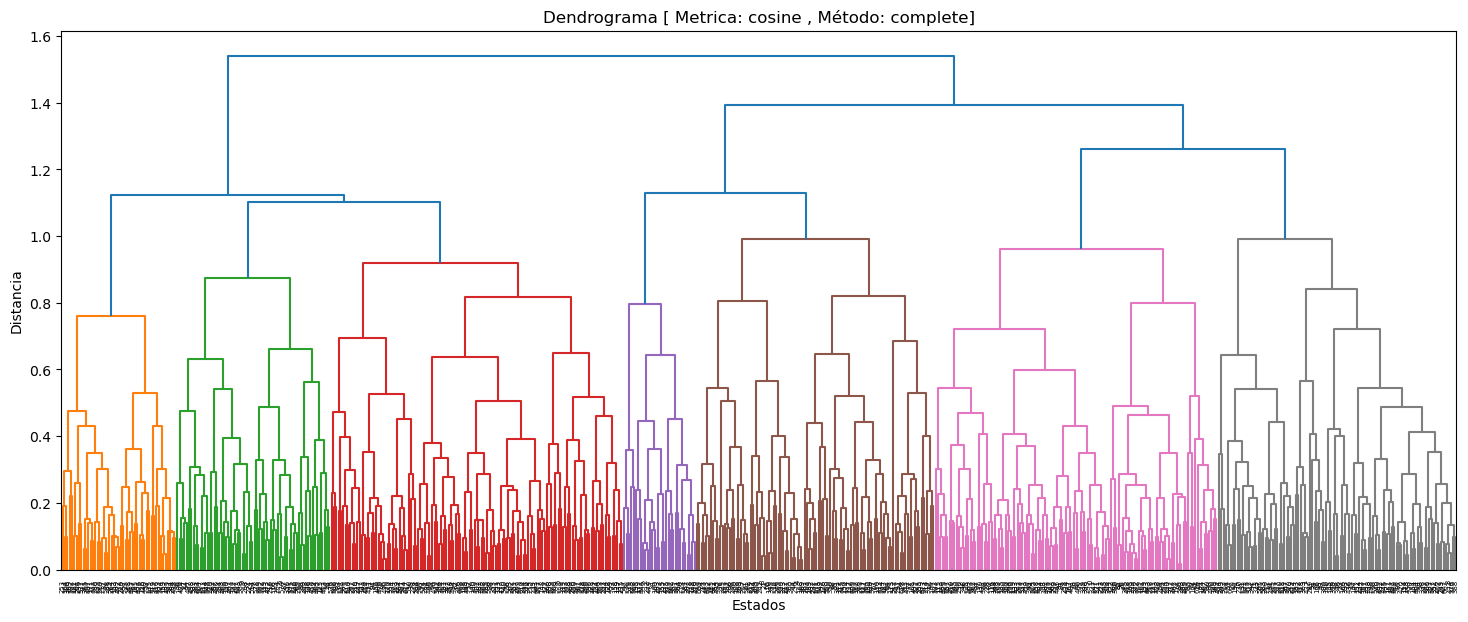

In [27]:
dendrogram_plot(euclidean_clustering, without_outliers.index, 'cosine', 'complete')

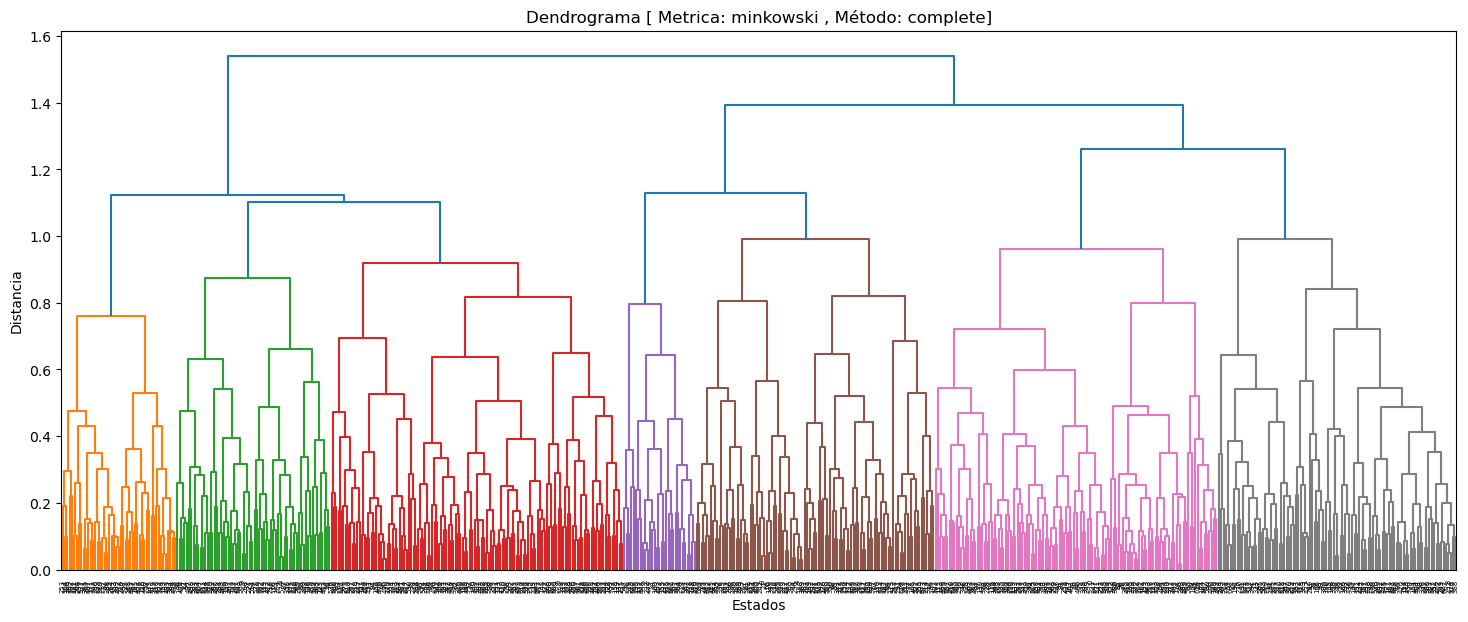

In [28]:
dendrogram_plot(euclidean_clustering, without_outliers.index, 'minkowski', 'complete')

### ⭕️ **Número óptimo de grupos**


In [29]:
# vector con los grupos
cluster_euclidean_label = cut_tree(euclidean_clustering, n_clusters=7).reshape(-1, )
without_outliers["cluster_euclidean"] = cluster_euclidean_label

cluster_cityblock_label = cut_tree(cityblock_clustering, n_clusters=7).reshape(-1, )
without_outliers["cluster_cityblock"] = cluster_cityblock_label

cluster_manhattan_label = cut_tree(manhattan_clustering, n_clusters=7).reshape(-1, )
without_outliers["cluster_manhattan"] = cluster_manhattan_label

cluster_minkowski_label = cut_tree(minkowski_clustering, n_clusters=7).reshape(-1, )
without_outliers["cluster_minkowski"] = cluster_minkowski_label

without_outliers.head()

,log.annual.inc,dti,fico,revol.util,cluster_euclidean,cluster_cityblock,cluster_manhattan,cluster_minkowski
0,0.581455,0.222527,0.583333,0.045627,0,0,0,0
1,0.262312,0.497775,0.611111,0.074144,1,0,1,1
2,0.283214,0.366313,0.388889,0.517110,2,1,2,2
3,0.412486,0.138651,0.666667,0.221483,1,0,0,1
4,0.463857,0.586101,0.583333,0.076996,3,2,3,3


### ⭕️ **Número óptimo de grupos**

In [30]:
cluster_euclidean_counts = without_outliers['cluster_euclidean'].value_counts()
cluster_cityblock_counts = without_outliers['cluster_cityblock'].value_counts()
cluster_manhattan_counts = without_outliers['cluster_manhattan'].value_counts()
cluster_minkowski_counts = without_outliers['cluster_minkowski'].value_counts()

print("Conteo de estados por clúster: \n")
print("\nEuclidean:\n", cluster_euclidean_counts)
print("\nCityblock:\n", cluster_cityblock_counts)
print("\nManhattan:\n", cluster_manhattan_counts)
print("\nMinkowski:\n", cluster_minkowski_counts)

Conteo de estados por clúster: 


Euclidean:
 cluster_euclidean
4    125
0    121
1    102
3    102
5     66
6     49
2     31
Name: count, dtype: int64

Cityblock:
 cluster_cityblock
0    161
4    136
3    104
5     86
1     67
2     27
6     15
Name: count, dtype: int64

Manhattan:
 cluster_manhattan
0    139
2    134
3     97
5     89
4     64
1     59
6     14
Name: count, dtype: int64

Minkowski:
 cluster_minkowski
4    125
0    121
1    102
3    102
5     66
6     49
2     31
Name: count, dtype: int64


### ⭕️ **Caracterización de los grupos**
Realizar un resumen descriptivo de los grupos e incluyan diagramas de caja para comparar su comportamiento en cada variable.

*   ¿Cuáles son las variables que permiten diferenciar entre los grupos y cuáles no?
*   Describan los grupos considerando únicamente las variables que los distinguen claramente.
*   ¿Cuál es el comportamiento de las variables categóricas por grupo?

### ⭕️ **Solución**

Para solucionar tomaremos como referencia el cluster desarollada por la metrica `Euclidean`

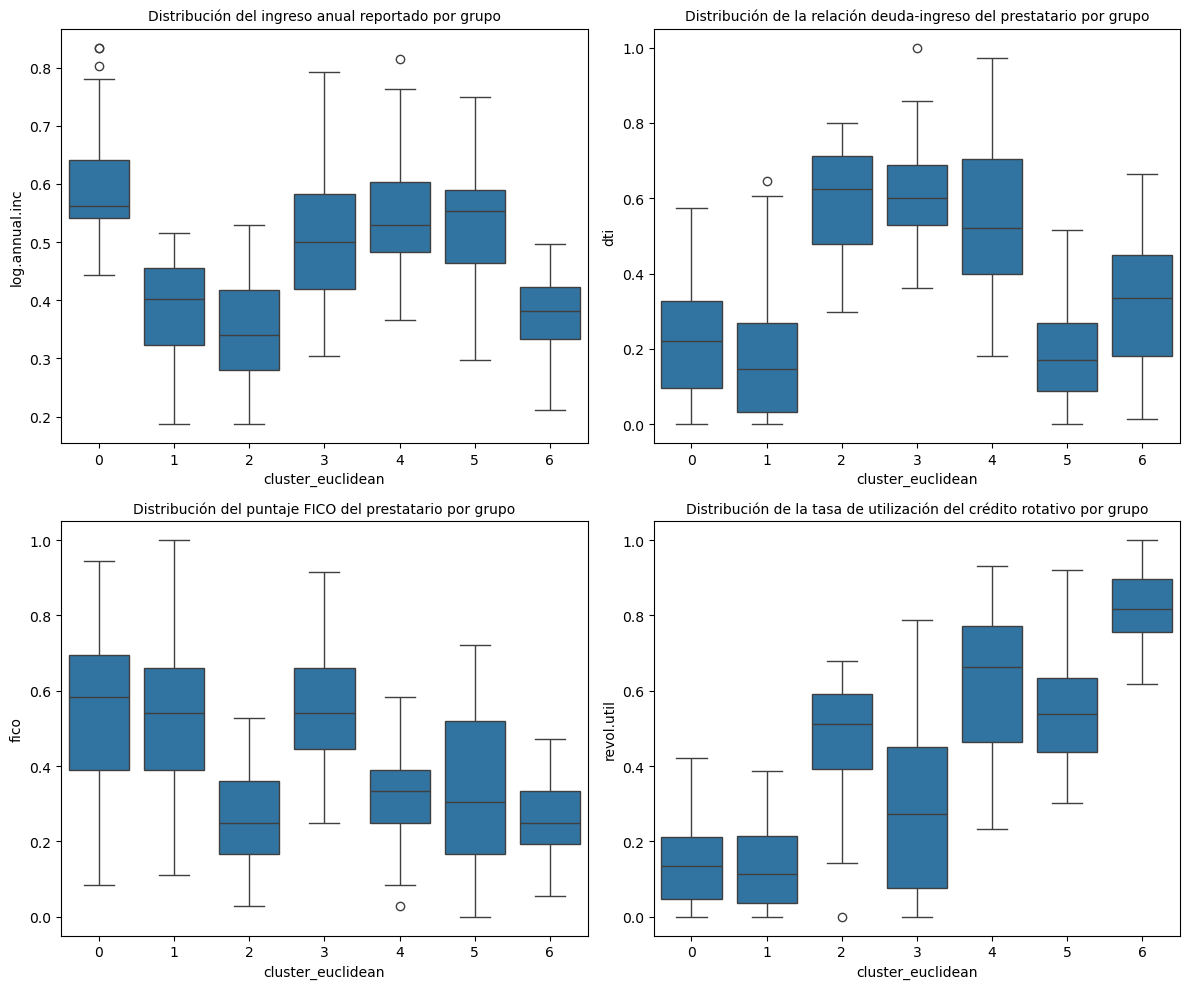

In [32]:
# crear una cuadrícula de 2x2 para los boxplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# graficar cada boxplot en su respectiva subgráfica
sns.boxplot(x='cluster_euclidean', y='log.annual.inc', data=without_outliers, ax=axes[0, 0])
axes[0, 0].set_title('Distribución del ingreso anual reportado por grupo', fontsize = 10)

sns.boxplot(x='cluster_euclidean', y='dti', data=without_outliers, ax=axes[0, 1])
axes[0, 1].set_title('Distribución de la relación deuda-ingreso del prestatario por grupo', fontsize = 10)

sns.boxplot(x='cluster_euclidean', y='fico', data=without_outliers, ax=axes[1, 0])
axes[1, 0].set_title('Distribución del puntaje FICO del prestatario por grupo', fontsize = 10)

sns.boxplot(x='cluster_euclidean', y='revol.util', data=without_outliers, ax=axes[1, 1])
axes[1, 1].set_title('Distribución de la tasa de utilización del crédito rotativo por grupo', fontsize = 10)

# ajustar el espacio entre subgráficas
plt.tight_layout()
plt.show()